In [0]:
%pip install --upgrade pip
%pip install awscli
%pip install tensorflow-serving-api
%pip install -q tensorflow-recommenders
%pip install --force-reinstall tensorflow==2.10.0

Python interpreter will be restarted.
Requirement already satisfied: pip in /local_disk0/.ephemeral_nfs/envs/pythonEnv-8cee8888-8259-42bb-a86c-0dfa155c83d0/lib/python3.8/site-packages (21.0.1)
Collecting pip
 Using cached pip-23.2.1-py3-none-any.whl (2.1 MB)
Installing collected packages: pip
 Attempting uninstall: pip
 Found existing installation: pip 21.0.1
 Uninstalling pip-21.0.1:
 Successfully uninstalled pip-21.0.1
Successfully installed pip-23.2.1
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting awscli
 Obtaining dependency information for awscli from https://files.pythonhosted.org/packages/71/4f/162367b05afa3444e9e61a4b88c32cd3b392e2f9bc45a2505d9488927662/awscli-1.29.35-py3-none-any.whl.metadata
 Using cached awscli-1.29.35-py3-none-any.whl.metadata (11 kB)
Collecting botocore==1.31.35 (from awscli)
 Obtaining dependency information for botocore==1.31.35 from https://files.pythonhosted.org/packages/35/5a/effb72e1cee7f9f3538a73b75870687cef1d9a377da7a70b75d7e1a38c5c/botocore-1.31.35-py3-none-any.whl.metadata
 Using cached botocore-1.31.35-py3-none-any.whl.metadata (6.0 kB)
Collecting docutils<0.17,>=0.10 (from awscli)
 Using cached docutils-0.16-py2.py3-none-any.whl (548 kB)
Collecting s3transfer<0.7.0,>=0.6.0 (from awscli)
 Obtaining dependency information for s3transfer<0.7.0,>=0.6.0 from https://files.pythonhosted.org/packages/d9/17/a3b666f5ef9543cfd3c661d39d1e193abb9649d0cfbbfee3cf3b51d5af02/s3transfer-0.6.2-py3-none-any.whl.metadata
 Using cached s3transfer-0.6.2-py3-none-any.whl.metadata (1.8 kB)
Requirement already satisfied: PyYAML<6.1,>=3.10 in /databricks/python3/lib/python3.8/site-packages (from awscli) (5.4.1)
Collecting colorama<0.4.5,>=0.2.5 (from awscli)
 Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Collecting rsa<4.8,>=3.1.2 (from awscli)
 Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
Requirement already satisfied: jmespath<2.0.0,>=0.7.1 in /databricks/python3/lib/python3.8/site-packages (from botocore==1.31.35->awscli) (0.10.0)
Requirement already satisfied: python-dateutil<3.0.0,>=2.1 in /databricks/python3/lib/python3.8/site-packages (from botocore==1.31.35->awscli) (2.8.1)
Requirement already satisfied: urllib3<1.27,>=1.25.4 in /databricks/python3/lib/python3.8/site-packages (from botocore==1.31.35->awscli) (1.25.11)
Requirement already satisfied: pyasn1>=0.1.3 in /databricks/python3/lib/python3.8/site-packages (from rsa<4.8,>=3.1.2->awscli) (0.4.8)
Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.8/site-packages (from python-dateutil<3.0.0,>=2.1->botocore==1.31.35->awscli) (1.15.0)
Using cached awscli-1.29.35-py3-none-any.whl (4.2 MB)
Using cached botocore-1.31.35-py3-none-any.whl (11.1 MB)
Using cached s3transfer-0.6.2-py3-none-any.whl (79 kB)
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Installing collected packages: rsa, docutils, colorama, botocore, s3transfer, awscli
 Attempting uninstall: rsa
 Found existing installation: rsa 4.8
 Not uninstalling rsa at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-8cee8888-8259-42bb-a86c-0dfa155c83d0
 Can't uninstall 'rsa'. No files were found to uninstall.
 Attempting uninstall: botocore
 Found existing installation: botocore 1.19.7
 Not uninstalling botocore at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-8cee8888-8259-42bb-a86c-0dfa155c83d0
 Can't uninstall 'botocore'. No files were found to uninstall.
 Attempting uninstall: s3transfer
 Found existing installation: s3transfer 0.3.7
 Not uninstalling s3transfer at /databricks/python3/lib/python3.8/si

In [0]:
# PACKAGES
import tensorflow as tf
import tensorflow_recommenders as tfrs
import random
import pickle
import boto3
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# PATHS
MEESHAWN_HOME = 's3://disco-adhoc/summerinterns2023/Meeshawn'
S3_BUCKET     = 'disco-adhoc'
S3_KEY        =  'summerinterns2023/Meeshawn'
TRAIN_FILE    = 'train_rail_clicks.tfrecords'
TEST_FILE     = 'test_rail_clicks.tfrecords'
LOCAL_DIR     = '/tmp/meeshawn'

# MODEL CONSTANTS
BATCH_SIZE         = 2048
DIM_PROG_EMBEDDING = 64
DIM_TIME_EMBEDDING = 64
DIM_ROW_EMBEDDING  = 64
MAX_SEQ_LENGTH     = 50
MAX_TOKENS         = 10000

s3 = boto3.client('s3')
tf.random.set_seed(9)

/databricks/python/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
 warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "

In [0]:

# LOAD THE TRAINING AND TEST DATA
dbutils.fs.mkdirs(f'file:{LOCAL_DIR}')
s3.download_file(S3_BUCKET, f'{S3_KEY}/train/{TRAIN_FILE}', f'{LOCAL_DIR}/{TRAIN_FILE}')
s3.download_file(S3_BUCKET, f'{S3_KEY}/test/{TEST_FILE}', f'{LOCAL_DIR}/{TEST_FILE}')

In [0]:
# HELPER FUNCTION: MAPPING FUNCTION FOR PARSING THE .TFRECORDS DATA & EXTRACTING RELEVANT DATA
def tfrecord_parser(data):
  schema = {'X_device_id': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
            'event_id': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
            'Y_row_node_id': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
            'Y_row_node_id_title': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
            'pinned': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
            'transaction': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),    
            'X_timestamp_clicks': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
            'X_timestamp_service': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
            'X_watch_history': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
            'candidates': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True)}

  data = tf.io.parse_single_example(data, schema)

  # timestamp           = data['X_timestamp_clicks'][0]
  X_watch_history     = data['X_watch_history']
  Y_row_node_id       = data['Y_row_node_id'][0]
  # Y_row_node_id_title = data['Y_row_node_id_title'][0]
  # candidates          = data['candidates']

  return (X_watch_history, Y_row_node_id)


# READING TRAIN '.TFRECORDS' FILES INTO TENSORFLOW 
train_dataset = tf.data.TFRecordDataset(f'{LOCAL_DIR}/{TRAIN_FILE}').map(tfrecord_parser, num_parallel_calls=tf.data.experimental.AUTOTUNE)\
                                                             .prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(train_dataset.reduce(0, lambda x,_: x+1).numpy())\
                             .padded_batch(BATCH_SIZE, drop_remainder=True, 
                                           padding_values = ('',''))\
                             .prefetch(tf.data.experimental.AUTOTUNE)    

# READING TEST '.TFRECORDS' FILES INTO TENSORFLOW                                  
test_dataset = tf.data.TFRecordDataset(f'{LOCAL_DIR}/{TEST_FILE}').map(tfrecord_parser, num_parallel_calls=tf.data.experimental.AUTOTUNE)\
                                                            .prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.shuffle(test_dataset.reduce(0, lambda x,_: x+1).numpy())\
                           .padded_batch(BATCH_SIZE, drop_remainder=True, 
                                         padding_values = ('',''))\
                           .prefetch(tf.data.experimental.AUTOTUNE)                                  

In [0]:
print('Number of training datapoints: ', BATCH_SIZE*train_dataset.reduce(0, lambda x,_: x+1).numpy())
print('Number of test datapoints: ', BATCH_SIZE*test_dataset.reduce(0, lambda x,_: x+1).numpy())

Number of training datapoints: 2025472
Number of test datapoints: 851968

In [0]:
for example in train_dataset.unbatch().take(5):
  print('Watch History', example[0])
  print('Clicked Row', example[1])

Watch History tf.Tensor(
[b'5172289448907967112' b'6900883975581327112' b'5353913448023007112'
 b'7657735992299247112' b'7286977470314228112' b'5885001737935337112'
 b'7695804312293897112' b'7282356342227765112' b'7080238869484398112'
 b'5036889095215240112' b'5028169747583413112' b'5090169884672914112'
 b'9189648545046754112' b'8940569100689298112' b'8886284458150151112'
 b'9138064011312668112' b'5071948342430710112' b'9098504407076374112'
 b'6140554949066283112' b'5239543706113867112' b'8325892449289051112'
 b'5095451208423115112' b'7487655226619040112' b'6344109729247717112'
 b'8823407972383461112' b'5029698580207098112' b'8936884176505006112'
 b'6733226652991358112' b'4820982412888183112' b'8003089882869075112'
 b'8664591412629839112' b'5504807082302029112' b'8439667944960357112' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b''], shape=(505,), dtype=string)
Clicked Row tf.Tensor(b'8600015779223092225', shape=(), dtype=string)
Watch History tf.Tensor(
[b'7726546419073690112' b'6186324919015407112' b'7354065930905263112'
 b'5869995174191748112' b'8632578483360260112' b'5075120284917700112'
 b'8098311490844526112' b'6538446779496003112' b'5977008632670531112'
 b'5216843262853123112' b'7238108531742979112' b'6567241950448941112'
 b'4641268403353538112' b'7972303411097559112' b'8430339781642391112'
 b'8475369029128151112' b'6450954575124438112' b'4642913327036075112'
 b'4828730925084075112' b'6368218159110853112' b'8547045100338176112'
 b'8464796870822400112' b'6309425309842261112' b'5962459216580437112'
 b'5797384338729173112' b'8859072026474709112' b'8302222444648234112'
 b'8086257039503764112' b'5946149767687806112' b'9043923698753491112'
 b'6832074673384744112' b'8462874126834792112' b'9036855273058856112'
 b'8895515387596669112' b'8684425363494077112' b'8010272021770962112'
 b'7528615672596626112' b'5066130271341479112' b'7458905969316668112'
 b'7794717029506044112' b'8737472731004476112' b'8525837340577553112'
 b'5667196489902246112' b'5834897019205990112' b'4919630094104187112'
 b'7958918520271547112' b'8535037840126864112' b'5489708673962277112'
 b'8574844069568314112' b'6621206466591311112

In [0]:
# WATCH HISTORY
watch_history_vectorizer = tf.keras.layers.TextVectorization(max_tokens=MAX_TOKENS, output_mode='int', output_sequence_length=MAX_SEQ_LENGTH, name='watch_history_vectorizer')
watch_history_vectorizer.adapt(train_dataset.unbatch().map(lambda X_watch_history, Y_row_node_id, candidates: X_watch_history))

with open(f'{LOCAL_DIR}/watch_history_vectorizer.pkl', 'wb') as f:
  pickle.dump({'config':  watch_history_vectorizer.get_config(),
               'weights': watch_history_vectorizer.get_weights()}, f)
                
s3.upload_file(f'{LOCAL_DIR}/watch_history_vectorizer.pkl', S3_BUCKET, f'{S3_KEY}/train/watch_history_vectorizer.pkl')

# CANDIDATES
candidates_vectorizer = tf.keras.layers.TextVectorization(max_tokens=MAX_TOKENS, output_mode='int', output_sequence_length=MAX_SEQ_LENGTH, name='candidates_vectorizer')
candidates_vectorizer.adapt(train_dataset.unbatch().map(lambda X_watch_history, Y_row_node_id, candidates: candidates))

with open(f'{LOCAL_DIR}/candidates_vectorizer.pkl', 'wb') as f:
  pickle.dump({'config':  candidates_vectorizer.get_config(),
               'weights': candidates_vectorizer.get_weights()}, f)
                
s3.upload_file(f'{LOCAL_DIR}/candidates_vectorizer.pkl', S3_BUCKET, f'{S3_KEY}/train/candidates_vectorizer.pkl')

In [0]:
s3.download_file(S3_BUCKET, f'{S3_KEY}/train/watch_history_vectorizer.pkl',f'{LOCAL_DIR}/watch_history_vectorizer.pkl')
with open(f'{LOCAL_DIR}/watch_history_vectorizer.pkl', 'rb') as f:
  vect_file = pickle.load(f)
  watch_history_vectorizer = tf.keras.layers.TextVectorization.from_config(vect_file['config'])
  watch_history_vectorizer.set_weights(vect_file['weights'])

s3.download_file(S3_BUCKET, f'{S3_KEY}/train/candidates_vectorizer.pkl', f'{LOCAL_DIR}/candidates_vectorizer.pkl')
with open(f'{LOCAL_DIR}/candidates_vectorizer.pkl', 'rb') as f:
  vect_file = pickle.load(f)
  candidates_vectorizer = tf.keras.layers.TextVectorization.from_config(vect_file['config'])
  candidates_vectorizer.set_weights(vect_file['weights'])    

In [0]:
print(watch_history_vectorizer.vocabulary_size())
print(candidates_vectorizer.vocabulary_size())

10000
506

In [0]:
# for index, word in enumerate(watch_history_vectorizer.get_vocabulary()):
for index, word in enumerate(candidates_vectorizer.get_vocabulary()):
  print(index, word)

0 
1 [UNK]
2 7386292962882324225
3 8890886348803145225
4 8886092865216051225
5 8627448394310810225
6 8626456929745727225
7 8470133393373175225
8 8438613934068486225
9 8400493276165105225
10 8366410425675171225
11 8309901081252438225
12 8306133964117031225
13 8168124355963875225
14 8143640046943044225
15 7989385532637824225
16 7833452405420120225
17 7766966019802622225
18 7685349037451933225
19 7523445721733088225
20 7440820094355965225
21 7349691907679512225
22 7093954710051461225
23 7061915056738204225
24 6696672172703483225
25 6397278346792991225
26 6295710680497904225
27 6246964422404126225
28 6126385501616143225
29 5738109810002880225
30 5334423307910590225
31 5135862066471838225
32 4930542362881425225
33 4669246525363068225
34 9110841136378566225
35 8286608412627376225
36 8285104187561912225
37 8184031886705201225
38 7837429547012032225
39 7161215601158795225
40 6914306695311011225
41 6882177349378826225
42 6854748600307447225
43 6808142706214667225
44 6645382235652358225
45 6130713121813961225
46 5400741701670942225
47 4839627925342147225
48 4837098652364264225
49 4773775875862330225
50 7374427115169791225
51 5954363723722680225
52 9151197973153279225
53 8916010094318869225
54 8910970317103361225
55 8846804775829899225
56 8627869087220711225
57 8159618139419784225
58 7984558069404054225
59 7950444086770469225
60 7355653591597708225
61 7224285964705791225
62 7116388112865310225
63 7091309403220835225
64 7048293312620720225
65 6983578233734857225
66 6972245064633784225
67 6963682684170076225
68 6394125733469743225
69 6085450135393993225
70 6063093843306391225
71 5748052810296511225
72 5407215018442494225
73 5388829664890438225
74 5314095332863599225
75 5092033725498951225
76 8740364699133875225
77 8548432873550666225
78 8492757821650939225
79 8009377166296212225
80 7416840462085372225
81 7010393161072907225
82 6774360883599898225
83 6744493480251228225
84 6667487938036273225
85 6481459506036198225
86 6294764330121662225
87 6274578344535211225
88 6220298859210273225
89 5531071896133587225
90 5521562824020928225
91 5151359148562809225
92 4664891126860817225
93 8058071098238218225
94 7930425553329124225
95 7877604440697565225
96 7226479353104572225
97 6263917639725673225
98 6133504966522429225
99 5965619797550850225
100 5926601220855550225
101 5672130589038158225
102 5617685115359448225
103 5561807802188034225
104 5880038318026733225
105 8775408601295011225
106 9027666741994410225
107 8779440180874760225
108 8741913289460937225
109 8600015779223092225
110 8372838503107407225
111 8307674306950864225
112 8300805825203586225
113 8271498918627861225
114 7898766322089773225
115 7880710818780013225
116 7838476221559334225
117 7721263531008334225
118 7698949310722106225
119 7681472189965513225
120 7366572299066694225
121 7306392915513513225
122 7025791797702278225
123 7020720166042770225
124 6755090942078387225
125 6697035961534792225
126 6554705882621833225
127 6452495741666688225
128 6410795953435193225
129 6294433615000043225
130 6185745933584702225
131 6098439372738196225
132 5881579860894874225
133 5634382933281451225
134 5563910804426843225
135 5516903912244555225
136 5381455552218833225
137 5278418883805730225
138 4948560419393346225
139 4945206421267280225
140 4945071755653380225
141 4915764037174988225
142 8640164929437272225
143 8315499195326421225
144 7946046020564617225
145 7732602279287479225
146 5853748865256226225
147 4737605494245080225
148 4731626724219837225
149 7112220751649809225
150 6848438816928459225
151 6541959845842303225
152 7305806159854851225
153 6801478024454434225
154 6861264383204312225
155 8034090149223453225
156 8963635835327272225
157 8741299047197842225
158 8679457481216390225
159 4817250838226556225
160 5001108232909926225
161 5822571341891452225
162 6491033171414485225
163 6299085047115957225
164 8896524313547069225
165 4944287617967949225
166 8834468642553256225
167 8151766056742809225
168 8074860334894073225
169 8061486405175260225
170 7660697116638765225
171 7569831762596870225
172 72038318091

In [0]:
embedVect = tf.keras.layers.Embedding(watch_history_vectorizer.vocabulary_size(), DIM_PROG_EMBEDDING, mask_zero = True )
avg = tf.keras.layers.GlobalAveragePooling1D()                                             

for watchHist, clickedRow in train_dataset.take(1):
  # TEXT VECTORIZATION
  print(watchHist)
  print(watch_history_vectorizer(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True)))
  print(embedVect(watch_history_vectorizer(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True))))
  print(avg(embedVect(watch_history_vectorizer(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True)))))
  print(clickedRow)
  print(candidates_vectorizer(clickedRow)[:,0])

tf.Tensor(
[[b'5318373328584106112' b'7805319719278650112' b'7726546419073690112'
 ... b'' b'' b'']
 [b'5032765759544218112' b'7726546419073690112' b'8885873001296559112'
 ... b'' b'' b'']
 [b'5748627796092698112' b'8510088497444570112' b'7086831482574874112'
 ... b'' b'' b'']
 ...
 [b'7238628805909210112' b'4887842621510959112' b'5440997511612719112'
 ... b'' b'' b'']
 [b'6832556329599066112' b'5146026441021146112' b'6211694420279236112'
 ... b'' b'' b'']
 [b'5515987070799162112' b'6510087625575834112' b'7537061085027583112'
 ... b'' b'' b'']], shape=(2048, 546), dtype=string)
tf.Tensor(
[[3171 7776 60 ... 0 0 0]
 [1534 60 5220 ... 4015 1 38]
 [7118 4148 1547 ... 123 4 1993]
 ...
 [ 863 284 1 ... 23 1992 34]
 [ 108 1129 232 ... 4 1055 4191]
 [2035 1590 203 ... 81 1074 320]], shape=(2048, 50), dtype=int64)
tf.Tensor(
[[[ 1.90470554e-02 1.83492415e-02 -9.28382948e-03 ... 4.56057489e-04
 9.98172909e-03 1.45824812e-02]
 [ 8.21206719e-03 -3.72363254e-03 2.36213692e-02 ... -4.67952006e-02
 4.71314825e-02 4.07178067e-02]
 [-2.91331057e-02 2.38424055e-02 4.67533581e-02 ... 3.23228575e-02
 -4.54254262e-02 2.79008485e-02]
 ...
 [-7.86863640e-03 1.33679025e-02 -1.21100768e-02 ... -4.94478121e-02
 -4.64545488e-02 3.39841731e-02]
 [-7.86863640e-03 1.33679025e-02 -1.21100768e-02 ... -4.94478121e-02
 -4.64545488e-02 3.39841731e-02]
 [-7.86863640e-03 1.33679025e-02 -1.21100768e-02 ... -4.94478121e-02
 -4.64545488e-02 3.39841731e-02]]

 [[-3.96888629e-02 5.05682081e-03 -1.75306797e-02 ... 3.05046700e-02
 3.00423540e-02 -1.69614442e-02]
 [-2.91331057e-02 2.38424055e-02 4.67533581e-02 ... 3.23228575e-02
 -4.54254262e-02 2.79008485e-02]
 [-2.14599371e-02 2.09926628e-02 -5.97112253e-03 ... 4.59381007e-02
 1.50046684e-02 -4.61236499e-02]
 ...
 [-4.69070338e-02 4.69797961e-02 -2.53500585e-02 ... 2.30656303e-02
 -2.42145788e-02 1.26408450e-02]
 [-2.00742241e-02 1.56204440e-02 1.74201764e-02 ... -1.75654069e-02
 -4.19863351e-02 3.11841816e-03]
 [-2.10820679e-02 2.13701613e-02 -4.87234592e-02 ... 1.41267665e-02
 -1.17263570e-02 -3.70293148e-02]]

 [[-2.38948818e-02 4.78355624e-02 2.76946463e-02 ... -4.33466695e-02
 -2.82909404e-02 2.10674889e-02]
 [ 1.57680362e-03 2.61953138e-02 -2.99383327e-03 ... 4.94491197e-02
 5.26161119e-03 2.22746842e-02]
 [-2.27527861e-02 -4.04631272e-02 -3.42127569e-02 ... -6.10910356e-04
 3.10321487e-02 -4.63459976e-02]
 ...
 [-2.79793981e-02 2.86984481e-02 -4.45673242e-02 ... -1.77581087e-02
 -1.72490999e-03 2.38181278e-03]
 [ 4.18161638e-02 -3.46707590e-02 -4.52856682e-02 ... -1.33745782e-02
 5.63139841e-03 1.25021227e-02]
 [ 3.01044099e-02 -3.68468538e-02 3.34388874e-02 ... 1.94490589e-02
 1.89583041e-02 -3.87066230e-02]]

 ...

 [[ 1.00893266e-02 3.81859206e-02 2.81207673e-02 ... -4.09416445e-02
 1.17383115e-02 -4.23471332e-02]
 [ 3.27617787e-02 3.61035503e-02 4.14717942e-04 ... -4.67904210e-02
 1.39318965e-02 6.86614588e-03]
 [-2.00742241e-02 1.56204440e-02 1.74201764e-02 ... -1.75654069e-02
 -4.19863351e-02 3.11841816e-03]
 ...
 [-6.75161928e-03 2.93753482e-02 -4.65787575e-03 ... -1.56186335e-02
 4.07775678e-02 1.66155808e-02]
 [ 3.97048108e-02 -4.87029552e-03 -2.50877067e-03 ... -5.73158264e-04
 -3.41549069e-02 -1.98078156e-02]
 [-3.54491360e-02 -4.38559651e-02 -1.91250201e-02 ... -2.42286455e-02
 4.05063517e-02 -2.68138181e-02]]

 [[ 2.48356126e-02 2.76771821e-02 -2.39668041e-03 ... -9.35361534e-03
 -1.03298798e-02 3.13130729e-02]
 [ 8.85199383e-03 -3.31776366e-02 3.95599492e-02 ... -2.56771576e-02
 3.07822712e-02 1.40340813e-02]
 [-3.25299650e-02 5.30046225e-03 1.60374492e-03 ... 4.54577096e-02
 -1.11886114e-03 4.88558672e-02]
 ...
 [ 4.18161638e-02 -3.46707590e-02 -4.52856682e-02 ... -1.33745782e-02
 5.63139841e-03 1.25021227e-02]
 [ 2.19793245e-03 1.27718486e-02 -4.80015166e-02 ... 1.34293474e-02
 -2.20192075e-02 4.96232547e-02]
 [ 4.77313139e-02 2.02342905e-02 4.00809385e-02 ... 1.36909001e-02
 -2.74190661e-02 3.31164040e-02]]

 [[ 2.21621506e-02 -3.51798162e-02 -7.49520212e-03 ... -2.95608398e-02
 -1.99575908e-02

In [0]:
class CustomMRR(tf.keras.metrics.Metric):
  def __init__(self, name='CustomMRR'):
    super().__init__(name=name)
    self.MRR_sum = self.add_weight(name='mrr', initializer='zeros')
    self.num_batches = self.add_weight(name='num_batches', initializer='zeros')      

  def update_state(self, y_true, y_pred, sample_weight=None):
    num_classes = tf.cast(candidates_vectorizer.vocabulary_size(), tf.int32)
    y_true = tf.one_hot(y_true, num_classes)
    rank_MRR = tf.cast(tf.range(1,num_classes+1), tf.float32)    
    
    sorted_indices_y_pred = tf.argsort(y_pred, direction='DESCENDING', axis=1)
    sorted_y_true = tf.gather(y_true, sorted_indices_y_pred, axis=1, batch_dims=1)

    # MRR = max_i (y_true/i), y_true is sorted based on y_pred
    mrr = tf.reduce_max(tf.divide(tf.cast(sorted_y_true, tf.float32), rank_MRR), axis=1)    # (BATCH_SIZE,)

    # Appending Individual MRR BATCH Mean 
    self.MRR_sum.assign_add(tf.reduce_mean(mrr))  
    self.num_batches.assign_add(1)    

  def result(self):
    return tf.divide(self.MRR_sum, self.num_batches)
  
  def reset_state(self):
    self.MRR_sum.assign(0.0)
    self.num_batches.assign(0)  
    
Custom_MRR_Metric = CustomMRR()    

In [0]:
class CustomNDCG(tf.keras.metrics.Metric):
  def __init__(self, name='CustomNDCG'):
    super().__init__(name=name)
    self.NDCG_sum = self.add_weight(name='ndcg', initializer='zeros')
    self.num_batches = self.add_weight(name='num_batches', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    num_classes = tf.cast(candidates_vectorizer.vocabulary_size(), tf.int32)
    y_true = tf.one_hot(y_true, num_classes)
    rank_discount_NDCG = tf.math.log(2.0)/tf.math.log(tf.cast(tf.range(1,num_classes+1) + 1, tf.float32))

    # DCG (y_true, y_pred), y_true is sorted based on y_pred
    sorted_indices_y_pred = tf.argsort(y_pred, direction='DESCENDING', axis=1)
    sorted_y_true = tf.gather(y_true, sorted_indices_y_pred, axis=1, batch_dims=1)
    dcg_y_true_y_pred = tf.reduce_sum(tf.math.multiply(tf.cast(sorted_y_true, tf.float32), rank_discount_NDCG), axis=1)

    # DCG (y_true, y_true), y_true is sorted within
    sorted_y_true = tf.sort(y_true, axis=1, direction='DESCENDING')
    dcg_y_true_y_true = tf.reduce_sum(tf.math.multiply(tf.cast(sorted_y_true, tf.float32), rank_discount_NDCG), axis=1)

    # NDCG = DCG(y_true, y_pred) / DCG (y_true, y_true)
    ndcg = tf.divide(dcg_y_true_y_pred, dcg_y_true_y_true) # (BATCH_SIZE,)

    # Appending Individual NDCG BATCH Mean
    self.NDCG_sum.assign_add(tf.reduce_mean(ndcg))  
    self.num_batches.assign_add(1)

  def result(self):
    return tf.divide(self.NDCG_sum, self.num_batches)
     
  def reset_state(self):
    self.NDCG_sum.assign(0.0)
    self.num_batches.assign(0)
    
Custom_NDCG_Metric = CustomNDCG()    

In [0]:
class SampledSoftmaxLoss(tf.keras.losses.Loss):
  def __init__(self, model, frac=0.75, name='Sampled_Softmax_Cross_Entropy_Loss'):
      super().__init__(name=name)
      self.num_candidates = model.num_candidates
      self.num_sampled    = round(frac*model.num_candidates)
      self.weights        = model.dense_layers.layers[-1].get_weights()[0]
      self.biases         = model.dense_layers.layers[-1].get_weights()[1]
      self.inputs         = model.dense_layers.layers[-1].input
   
  def call(self, y_true, y_pred):      
    labels = tf.expand_dims(y_true, -1)
    return tf.nn.sampled_softmax_loss(weights=self.weights,
                                      biases=self.biases,
                                      inputs=self.inputs,
                                      labels=labels,
                                      num_sampled = self.num_sampled,
                                      num_classes = self.num_candidates,
                                      name = 'Sampled_Softmax_Cross_Entropy_Loss')   

In [0]:
# SINGLE-TOWER RANKING MODEL FOR ROW/RAIL NODE CLICKS
class SingleTowerSoftmax(tfrs.Model):
  def __init__(self):
  # def __init__(self, loss_type='full_softmax'):
    super().__init__()

    # if loss_type != 'full_softmax' and loss_type != 'sampled_softmax':
    #   raise ValueError("Incorrect model configuration. Select either 'full_softmax' or 'sampled_softmax'")     
    
    # USER WATCH HISTORY FEATURE
    self.user_tower = tf.keras.Sequential([watch_history_vectorizer,
                                           tf.keras.layers.Embedding(watch_history_vectorizer.vocabulary_size(), 
                                                                     DIM_PROG_EMBEDDING, mask_zero = True,
                                                                     name = 'watch_history_embedding_layer'),
                                           tf.keras.layers.GlobalAveragePooling1D(name = 'watch_history_AVG_1D')], 
                                           name = 'watch_history_embedding')      
    
    self.num_candidates = candidates_vectorizer.vocabulary_size()
    self.dense_layers = tf.keras.Sequential([tf.keras.layers.Dense(256, activation='relu'),
                                             tf.keras.layers.Dense(128, activation="relu"),
                                             tf.keras.layers.Dense(64, activation="relu"),
                                             tf.keras.layers.Dense(self.num_candidates, activation='softmax')],
                                             name = 'dense_layers')       
    
    # TFRS TASK
    # Sampled_Softmax_Loss = SampledSoftmaxLoss(self, frac=0.75)
    # self.task = tfrs.tasks.Ranking(loss = Sampled_Softmax_Loss  if loss_type == 'sampled_softmax' else tf.keras.losses.SparseCategoricalCrossentropy(),    
    self.task = tfrs.tasks.Ranking(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                                   metrics = [Custom_NDCG_Metric,
                                              Custom_MRR_Metric,
                                              tf.keras.metrics.SparseCategoricalAccuracy()],
                                   name = 'tfrs_ranking_layer')    
                             
  def call(self, watchHist):
    user_embedding = self.user_tower(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True))  
    return self.dense_layers(user_embedding)

  def compute_loss(self, inputs, training=False):
    watchHist, clickedRow = inputs
    predictions = self(watchHist)
    labels = candidates_vectorizer(clickedRow)[:,0]
    return self.task(labels=labels, predictions=predictions)

In [0]:
cached_train = train_dataset.cache()
cached_test = test_dataset.cache()

singleTowerSoftmaxModel = SingleTowerSoftmax()
singleTowerSoftmaxModel.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

num_epochs=20
history = singleTowerSoftmaxModel.fit(cached_train, epochs=num_epochs)

Epoch 1/20
 1/Unknown - 43s 43s/step - CustomNDCG: 0.1379 - CustomMRR: 0.0112 - sparse_categorical_accuracy: 0.0000e+00 - loss: 6.2265 - regularization_loss: 0.0000e+00 - total_loss: 6.2265 2/Unknown - 43s 117ms/step - CustomNDCG: 0.2869 - CustomMRR: 0.1532 - sparse_categorical_accuracy: 0.0713 - loss: 6.2162 - regularization_loss: 0.0000e+00 - total_loss: 6.2162  3/Unknown - 43s 113ms/step - CustomNDCG: 0.3391 - CustomMRR: 0.2029 - sparse_categorical_accuracy: 0.0970 - loss: 6.2061 - regularization_loss: 0.0000e+00 - total_loss: 6.2061 4/Unknown - 43s 107ms/step - CustomNDCG: 0.3646 - CustomMRR: 0.2273 - sparse_categorical_accuracy: 0.1108 - loss: 6.1962 - regularization_loss: 0.0000e+00 - total_loss: 6.1962 5/Unknown - 43s 105ms/step - CustomNDCG: 0.3811 - CustomMRR: 0.2432 - sparse_categorical_accuracy: 0.1187 - loss: 6.1861 - regularization_loss: 0.0000e+00 - total_loss: 6.1861 6/Unknown - 43s 106ms/step - CustomNDCG: 0.3918 - CustomMRR: 0.2537 - sparse_categorical_accuracy: 0.1251 - loss: 6.1762 - regularization_loss: 0.0000e+00 - total_loss: 6.1762 7/Unknown - 43s 105ms/step - CustomNDCG: 0.3998 - CustomMRR: 0.2612 - sparse_categorical_accuracy: 0.1284 - loss: 6.1658 - regularization_loss: 0.0000e+00 - total_loss: 6.1658 8/Unknown - 43s 105ms/step - CustomNDCG: 0.4057 - CustomMRR: 0.2670 - sparse_categorical_accuracy: 0.1314 - loss: 6.1556 - regularization_loss: 0.0000e+00 - total_loss: 6.1556 9/Unknown - 43s 105ms/step - CustomNDCG: 0.4101 - CustomMRR: 0.2715 - sparse_categorical_accuracy: 0.1343 - loss: 6.1453 - regularization_loss: 0.0000e+00 - total_loss: 6.1453 10/Unknown - 43s 105ms/step - CustomNDCG: 0.4144 - CustomMRR: 0.2757 - sparse_categorical_accuracy: 0.1371 - loss: 6.1342 - regularization_loss: 0.0000e+00 - total_loss: 6.1342 11/Unknown - 44s 105ms/step - CustomNDCG: 0.4174 - CustomMRR: 0.2786 - sparse_categorical_accuracy: 0.1387 - loss: 6.1229 - regularization_loss: 0.0000e+00 - total_loss: 6.1229 12/Unknown - 44s 106ms/step - CustomNDCG: 

Out[43]:

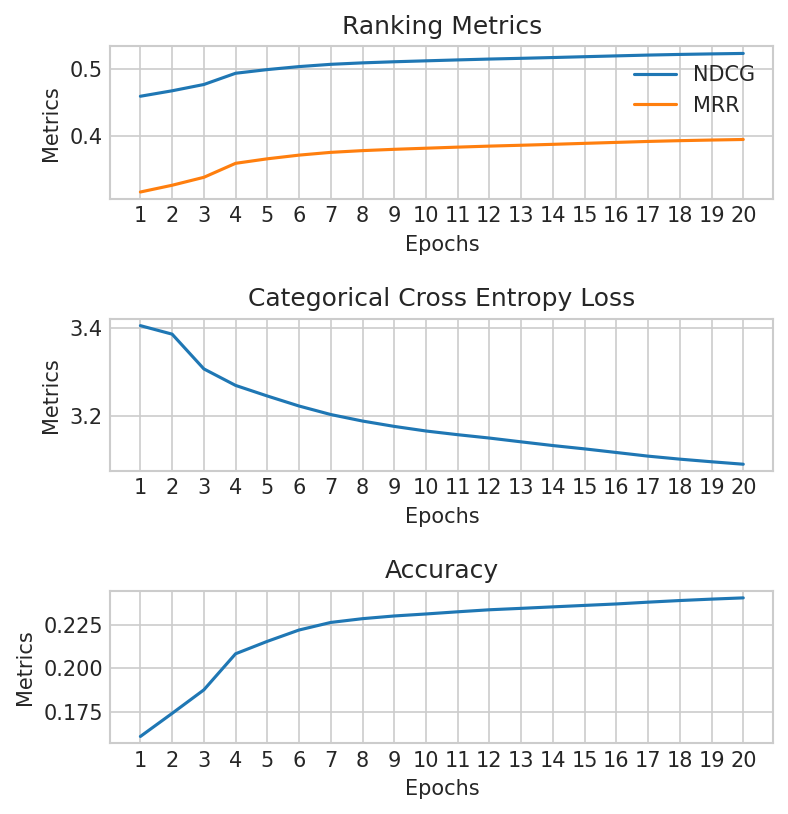

[<matplotlib.axis.XTick at 0x7fbaa05fbbe0>,
 <matplotlib.axis.XTick at 0x7fbaa05fbdf0>,
 <matplotlib.axis.XTick at 0x7fbaa0385f70>,
 <matplotlib.axis.XTick at 0x7fbaa0bdaf10>,
 <matplotlib.axis.XTick at 0x7fbaa0bda7c0>,
 <matplotlib.axis.XTick at 0x7fbaa0c2fe50>,
 <matplotlib.axis.XTick at 0x7fbaa06168e0>,
 <matplotlib.axis.XTick at 0x7fbaa0227280>,
 <matplotlib.axis.XTick at 0x7fbaa0227c40>,
 <matplotlib.axis.XTick at 0x7fbaa0c1a4f0>,
 <matplotlib.axis.XTick at 0x7fbaa0221a00>,
 <matplotlib.axis.XTick at 0x7fbaa023bd00>,
 <matplotlib.axis.XTick at 0x7fbaa01c50d0>,
 <matplotlib.axis.XTick at 0x7fbaa01c5dc0>,
 <matplotlib.axis.XTick at 0x7fbaa01c84f0>,
 <matplotlib.axis.XTick at 0x7fbaa01c50a0>,
 <matplotlib.axis.XTick at 0x7fbaa023bdf0>,
 <matplotlib.axis.XTick at 0x7fbaa0231580>,
 <matplotlib.axis.XTick at 0x7fbaa01cf100>,
 <matplotlib.axis.XTick at 0x7fbaa01e94c0>]

In [0]:
epochs = range(1,num_epochs+1,1)
fig, axs = plt.subplots(3, figsize=(6,6))
fig.tight_layout(pad=4)
fig.dpi = 150
axs[0].plot(epochs, history.history['CustomNDCG'],label='NDCG')
axs[0].plot(epochs, history.history['CustomMRR'],label='MRR')
axs[0].title.set_text('Ranking Metrics')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Metrics')
axs[0].set_xticks(epochs)
axs[0].legend()
axs[1].plot(epochs, history.history['loss'])
axs[1].title.set_text('Categorical Cross Entropy Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Metrics')
axs[1].set_xticks(epochs)
axs[2].plot(epochs, history.history['sparse_categorical_accuracy'])
axs[2].title.set_text('Accuracy')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Metrics')
axs[2].set_xticks(epochs)

In [0]:
metrics = singleTowerSoftmaxModel.evaluate(cached_test, return_dict=True)
print(f"Mean NDCG: {metrics['CustomNDCG']}")
print(f"Mean MRR: {metrics['CustomMRR']}")
print(f"Test Accuracy: {metrics['sparse_categorical_accuracy']}")

1/Unknown - 2s 2s/step - CustomNDCG: 0.5157 - CustomMRR: 0.3846 - sparse_categorical_accuracy: 0.2251 - loss: 3.1295 - regularization_loss: 0.0000e+00 - total_loss: 3.1295 2/Unknown - 2s 87ms/step - CustomNDCG: 0.5252 - CustomMRR: 0.3966 - sparse_categorical_accuracy: 0.2400 - loss: 3.0847 - regularization_loss: 0.0000e+00 - total_loss: 3.0847 3/Unknown - 3s 93ms/step - CustomNDCG: 0.5247 - CustomMRR: 0.3960 - sparse_categorical_accuracy: 0.2391 - loss: 3.0894 - regularization_loss: 0.0000e+00 - total_loss: 3.0894 4/Unknown - 3s 94ms/step - CustomNDCG: 0.5279 - CustomMRR: 0.4001 - sparse_categorical_accuracy: 0.2433 - loss: 3.0811 - regularization_loss: 0.0000e+00 - total_loss: 3.0811 5/Unknown - 3s 94ms/step - CustomNDCG: 0.5287 - CustomMRR: 0.4012 - sparse_categorical_accuracy: 0.2459 - loss: 3.0789 - regularization_loss: 0.0000e+00 - total_loss: 3.0789 6/Unknown - 3s 99ms/step - CustomNDCG: 0.5273 - CustomMRR: 0.3997 - sparse_categorical_accuracy: 0.2449 - loss: 3.0886 - regularization_loss: 0.0000e+00 - total_loss: 3.0886 7/Unknown - 3s 98ms/step - CustomNDCG: 0.5263 - CustomMRR: 0.3984 - sparse_categorical_accuracy: 0.2433 - loss: 3.0920 - regularization_loss: 0.0000e+00 - total_loss: 3.0920 8/Unknown - 3s 99ms/step - CustomNDCG: 0.5262 - CustomMRR: 0.3983 - sparse_categorical_accuracy: 0.2438 - loss: 3.0968 - regularization_loss: 0.0000e+00 - total_loss: 3.0968 9/Unknown - 3s 99ms/step - CustomNDCG: 0.5262 - CustomMRR: 0.3983 - sparse_categorical_accuracy: 0.2435 - loss: 3.0952 - regularization_loss: 0.0000e+00 - total_loss: 3.0952 10/Unknown - 3s 99ms/step - CustomNDCG: 0.5252 - CustomMRR: 0.3972 - sparse_categorical_accuracy: 0.2428 - loss: 3.1036 - regularization_loss: 0.0000e+00 - total_loss: 3.1036 11/Unknown - 3s 99ms/step - CustomNDCG: 0.5256 - CustomMRR: 0.3975 - sparse_categorical_accuracy: 0.2426 - loss: 3.0981 - regularization_loss: 0.0000e+00 - total_loss: 3.0981 12/Unknown - 3s 99ms/step - CustomNDCG: 0.5253 - CustomMRR: 0.3973 - sparse_categorical_accuracy: 0.2430 - l

In [0]:
index_to_word = {index: word for index, word in enumerate(candidates_vectorizer.get_vocabulary())}
def indices_to_word(indices):
  return [index_to_word[index.numpy()] for index in indices]

for watchHist, clickedRow in cached_test.take(1):
  predictions = indices_to_word(tf.argmax(singleTowerSoftmaxModel((watchHist)), axis=1))
  accuracy = tf.reduce_sum(tf.cast(predictions == clickedRow, tf.int32))/BATCH_SIZE
  print(f'Overall Test Accuracy: {accuracy:.4f}')
  for label, pred in zip(clickedRow, predictions):
    print(f'Ground Truth Label: {label}, Model Prediction: {pred}')

Overall Test Accuracy: 0.2251
Ground Truth Label: b'6263917639725673225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7349691907679512225', Model Prediction: 8600015779223092225
Ground Truth Label: b'8916010094318869225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7880710818780013225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'8916010094318869225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7386292962882324225', Model Prediction: 6063093843306391225
Ground Truth Label: b'7112220751649809225', Model Prediction: 8600015779223092225
Ground Truth Label: b'6848438816928459225', Model Prediction: 6696672172703483225
Ground Truth Label: b'8600015779223092225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'6696672172703483225', Model Prediction: 6696672172703483225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'5954363723722680225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'8286608412627376225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7386292962882324225', Model Prediction: 8600015779223092225
Ground Truth Label: b'6696672172703483225', Model Prediction: 6696672172703483225
Ground Truth Label: b'8600015779223092225', Model Prediction: 6063093843306391225
Ground Truth Label: b'5059747101060158225', Model Prediction: 7349691907679512225
Ground Truth Label: b'6697035961534792225', Model Prediction: 6696672172703483225
Ground Truth Label: b'7685349037451933225', Model Prediction: 8600015779223092225
Ground Truth Label: b'8286608412627376225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7833452405420120225', Model Prediction: 6696672172703483225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7386292962882324225', Model Prediction: 6696672172703483225
Ground Truth Label: b'7349691907679512225', Model Prediction: 8600015779223092225
Ground Truth Label: b'8600015779223092225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7349691907679512225', Model Prediction: 6696672172703483225
Ground Truth Label: b'8627448394310810225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7349691907679512225', Model Prediction: 8286608412627376225
Ground Truth Label: b'5954363723722680225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'8600015779223092225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'6696672172703483225', Model Prediction: 5150269368901820225
Ground Truth Label: b'8600015779223092225', Model Prediction: 8600015779223092225
Ground Truth Label: b'6848438816928459225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7386292962882324225', Model Prediction: 8600015779223092225
Ground Truth Label: b'5150269368901820225', Model Prediction: 5150269368901820225
Ground Truth Label: b'5954363723722680225', Model Prediction: 6696672172703483225
Ground Truth Label: b'8916010094318869225', Model Prediction: 8600015779223092225
Ground Truth Label: b'7349691907679512225', Model Prediction: 6696672172703483225
Ground Truth Label: b'7349691907679512225', Model Prediction: 7349691907679512225
Ground Truth Label: b'8600015779223092225', Model Prediction: 8916010094318869225
Ground Truth Label: b'8627448394310810225', Model Prediction: 8600015779223092225
Ground Truth Label: b'5954363723722680225', Model Prediction: 7349691907679512225
Ground Truth Label: b'7091309403220835225', Model Prediction: 6063093843306391225
Ground Truth Label: b'669667217270

In [0]:
singleTowerSoftmaxModel.summary()

Model: "single_tower_softmax_12"
_________________________________________________________________
 Layer (type) Output Shape Param # 
=================================================================
 watch_history_embedding (Se (None, 64) 640000 
 quential) 
 
 dense_layers (Sequential) (None, 506) 90682 
 
 tfrs_ranking_layer (Ranking multiple 0 
 ) 
 
=================================================================
Total params: 730,682
Trainable params: 730,682
Non-trainable params: 0
_________________________________________________________________

In [0]:
# TRAINED MODEL
singleTowerSoftmaxModel.save(f'{LOCAL_DIR}/singleTowerSoftmaxModel/')
for filename in dbutils.fs.ls(f'file:{LOCAL_DIR}/singleTowerSoftmaxModel/'):
  if filename.isDir():
    folderName = filename.name[:-1]
    for nestedFile in dbutils.fs.ls(filename.path):
      name = nestedFile.name
      filepath = nestedFile.path.replace('file:','')
      s3.upload_file(filepath, S3_BUCKET, f'{S3_KEY}/train/singleTowerSoftmaxModel/{folderName}/{name}')
  else:
    name = filename.name
    filepath = filename.path.replace('file:','')
    s3.upload_file(filepath, S3_BUCKET, f'{S3_KEY}/train/singleTowerSoftmaxModel/{name}')

# HISTORY    
with open(f'{LOCAL_DIR}/singleTowerSoftmaxModel/history.json', 'w') as f:
  import json
  json.dump(history.history, f)
s3.upload_file(f'{LOCAL_DIR}/singleTowerSoftmaxModel/history.json', S3_BUCKET, f'{S3_KEY}/train/singleTowerSoftmaxModel/history.json')

WARNING:absl:Found untraced functions such as tfrs_ranking_layer_layer_call_fn, tfrs_ranking_layer_layer_call_and_return_conditional_losses while saving (showing 2 of 2). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /tmp/meeshawn/singleTowerSoftmaxModel/assets
INFO:tensorflow:Assets written to: /tmp/meeshawn/singleTowerSoftmaxModel/assets

In [0]:
for file in dbutils.fs.ls(f'{MEESHAWN_HOME}/train/singleTowerSoftmaxModel/'):
  print(file)

FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/singleTowerSoftmaxModel/history.json', name='history.json', size=2180, modificationTime=1693017546000)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/singleTowerSoftmaxModel/keras_metadata.pb', name='keras_metadata.pb', size=19077, modificationTime=1693017546000)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/singleTowerSoftmaxModel/saved_model.pb', name='saved_model.pb', size=703253, modificationTime=1693017546000)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/singleTowerSoftmaxModel/variables/', name='variables/', size=0, modificationTime=1693017545441)